## Методы прогнозирования.

На лекциях мы изучили большое количество различных методов прогнозирования. 

В предыдущем файле мы подробно разобрали один из способов прогнозирования ARIMA.

В этом файле мы рассмотрим другие методы прогнозирования временных рядов и в конце `сравним их`.

Рассмотрим методы, которые мы проходили, а также дополнительные 
1. Method – **Start with a Naive Approach**
2. Method – **Simple average**
3. Method – **Moving average**
4. Method – **Single Exponential smoothing**
5. Method – **Holt’s linear trend method**
6. Method – **Holt’s Winter seasonal method**
7. Method – **ARIMA (SARIMA)**

### Сначало загрузим наши данные о ряде и посмотрим и проанализируем его графически.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 

#Importing data
df = pd.read_csv('нефть-brent-2010-2019.csv', parse_dates=[0])
#Printing head
df

,date,value
0,2019-09-01,58.84
1,2019-08-30,59.19
2,2019-08-29,60.37
3,2019-08-28,59.84
4,2019-08-27,59.59
...,...,...
2662,2010-09-05,76.63
2663,2010-09-04,76.62
2664,2010-09-03,76.57
2665,2010-09-02,76.89


In [2]:
#Printing tail
df.tail()

,date,value
2662,2010-09-05,76.63
2663,2010-09-04,76.62
2664,2010-09-03,76.57
2665,2010-09-02,76.89
2666,2010-09-01,76.37


Как видно из приведенных выше данных, мы получаем данные за 9 лет (2010–2019 год) на стоимость нефти, и нам необходимо оценить значение стоимости на будущее.

В этом документе я разбираю и объединяю наборы данных, чтобы объяснить различные методы.

1. Подмножество набора данных (сентябрь 2010 г. - сентябрь 2019 г.)
2. Создание тестового файла для моделирования. Первые 8 лет (сентябрь 2010 г. - июль 2018 г.) используются в качестве данных обучения, а следующий 1 год (август 2018 г. - август 2019 г.) - данные тестирования.

In [3]:
#Subsetting the dataset
df = pd.read_csv('нефть-brent-2010-2019.csv', parse_dates =["date"], index_col ="date") 

#Создание обучающего и тестового наборов
train=df[366:2666] 
test=df[0:365]

Визуализируем данные (обучающие и тестовые вместе), чтобы знать, как они меняются в течение определенного периода времени.

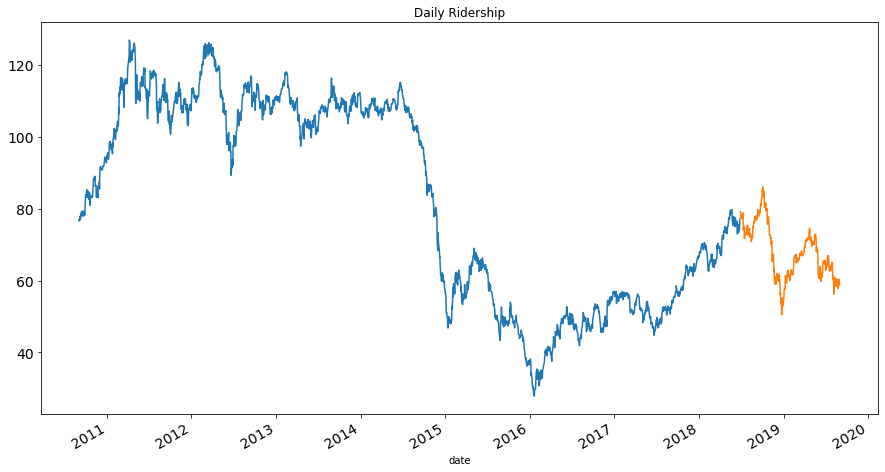

In [4]:
#Строим график
train.value.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.value.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

# Метод 1: Start with a Naive Approach

**Start with a Naive Approach (Начинаем с наивного подхода)** - Это такой метод прогнозирования, который предполагает, что следующая ожидаемая точка равна последней наблюдаемой точке, называется наивным методом.


In [5]:
from IPython.display import Image 

display(Image(url='https://1.bp.blogspot.com/-tyXkwveG3Fw/XXv3lg0ms1I/AAAAAAAAg5Y/yaWuJdOunlc2L7y7Y6r8dSvuABLGT1QHACLcBGAsYHQ/s1600/Screen-Shot-2018-01-25-at-7.45.20-PM.pngwidth = 200'))

Теперь мы будем реализовывать наивный метод  для прогнозирования цен на тестовых данных.

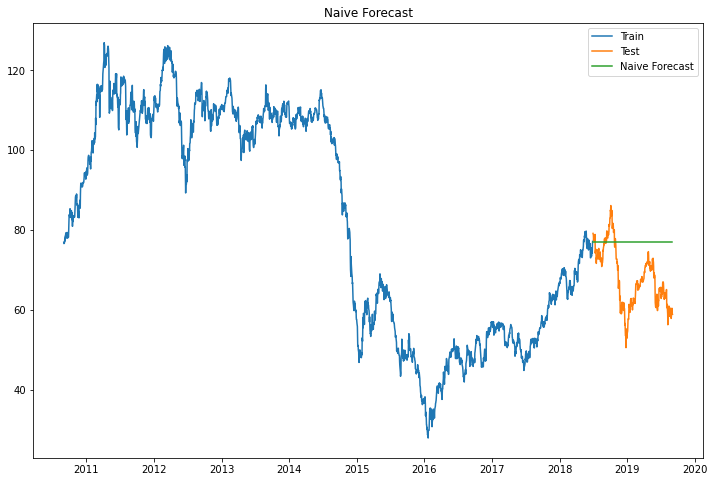

In [5]:
dd= np.asarray(train.value)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index,test['value'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

Теперь мы рассчитаем среднеквадратичную ошибку (RMSE), чтобы проверить точность нашей модели на тестовых данных.

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.value, y_hat.naive))
print(rms)

11.486779106719837


Из значения RMSE и приведенного выше графика можно сделать вывод, что наивный метод `не подходит` для наборов данных `с высокой изменчивостью`. Лучше всего он подходит для стабильных наборов данных. Теперь мы рассмотрим другую технику и попытаемся улучшить наш результат.


# Метод 2. Simple Average(Простое среднее).

Метод прогнозирования, который прогнозирует ожидаемое значение, равное среднему значению всех ранее наблюдаемых точек, называется методом **простого среднего**.

In [55]:
display(Image(url='https://1.bp.blogspot.com/-1Wr2G5KHXj4/XXv4T_4wVmI/AAAAAAAAg5o/yV7SvTZeh24OTunOtVooDM0TCp0Mmr-ZQCLcBGAsYHQ/s1600/Screen-Shot-2018-01-25-at-7.45.10-PM-300x82.png'))

Мы берем все ранее известные значения, вычисляем среднее значение и принимаем его как следующее значение. Конечно, это не будет точным попаданием, но достаточно близким. На самом деле бывают ситуации, когда этот метод работает лучше всего.

In [8]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['value'].mean()
y_hat_avg

,value,avg_forecast
date,,
2019-09-01,58.84,83.667861
2019-08-30,59.19,83.667861
2019-08-29,60.37,83.667861
2019-08-28,59.84,83.667861
2019-08-27,59.59,83.667861
...,...,...
2018-07-04,78.16,83.667861
2018-07-03,77.88,83.667861
2018-07-02,77.49,83.667861


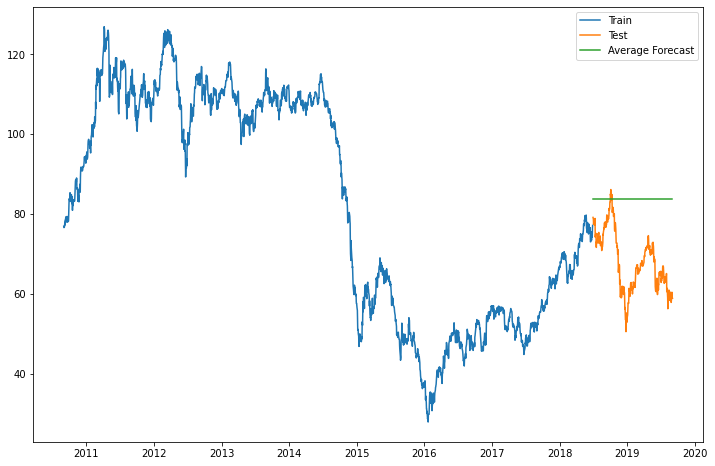

In [9]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['value'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

Теперь мы рассчитаем RMSE, чтобы проверить точность нашей модели.

In [10]:
test.value.fillna(test.value.mean(), inplace=True)
rms = sqrt(mean_squared_error(test.value, y_hat_avg.avg_forecast))
print(rms)

17.231117610206894


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Мы видим, что эта модель не улучшила нашу оценку. Следовательно, можно сделать вывод, что этот метод работает лучше всего, когда среднее значение за каждый период времени остается постоянным. Хотя наивный метод лучше, чем метод простого среднего, это не означает, что наивный метод лучше простого среднего для всех наборов данных. 

# Метод 3. Скользящее среднее.

Используя простую модель скользящего среднего, мы прогнозируем следующее значение (s) во временном ряду на основе среднего значения фиксированного конечного числа «p» предыдущих значений. Таким образом, для всех i > p



In [58]:
display(Image(url='https://1.bp.blogspot.com/-Tivi9KDnpI8/XXv7SEPMX5I/AAAAAAAAg6I/YAPdl5izOUk2nG2BDhMuDIaW3qOk9ZknQCLcBGAsYHQ/s1600/Screen-Shot-2018-01-25-at-7.47.33-PM.png'))

Скользящая средняя на самом деле может быть довольно эффективной, особенно если вы выберете правильное значение p для ряда.


In [11]:
def moving_average(series, n):
    return np.average(series[-n:])

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast']=moving_average(train['value'], 1)


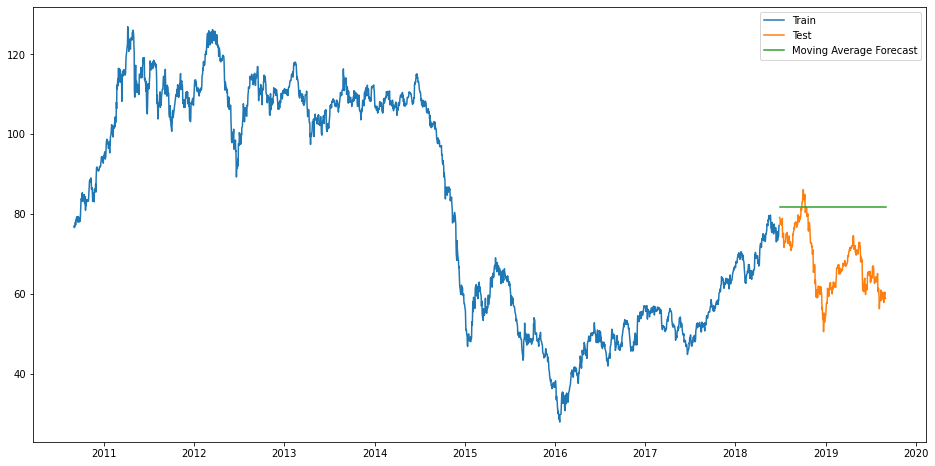

In [12]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['value'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

Теперь мы рассчитаем RMSE, чтобы проверить точность нашей модели.

In [13]:
rms=sqrt(mean_squared_error(test.value, y_hat_avg.moving_avg_forecast))
print(rms)

15.511237493468053


Мы видим, что наивный метод превосходит как метод простого среднего, так и метод скользящего среднего для этого набора данных. Теперь мы рассмотрим метод простого экспоненциального сглаживания и посмотрим, как он работает.

Дальнейшее развитие метода скользящей средней - метод взвешенной скользящей средней. В методе скользящего среднего, как показано выше, мы одинаково взвешиваем прошлые «n» наблюдений. Но мы можем столкнуться с ситуациями, когда каждое из наблюдений из «n» значений по-своему влияет на прогноз. Такой метод, который по-разному взвешивает прошлые наблюдения, называется методом взвешенного скользящего среднего.

Взвешенное скользящее среднее - это скользящее среднее, в котором значениям скользящего окна присваиваются разные веса, как правило, так что более свежие точки имеют большее значение. Вместо выбора размера окна требуется список весов (которые в сумме должны составлять до 1). 

In [67]:
display(Image(url='https://1.bp.blogspot.com/-hw-SBNg9ua4/XXv77R8XPiI/AAAAAAAAg6Y/i6M2iu7QBIoJv0Yn4qXUYaneMFk6k375wCLcBGAsYHQ/s1600/nnn-768x84.png'))

Например, если мы выберем [0,40, 0,25, 0,20, 0,15] в качестве весов, мы дадим 40%, 25%, 20% и 15% последним 4 точкам соответственно.

# Метод 4 – простое экспоненциальное сглаживание

Поняв вышеописанные методы, мы можем заметить, что простое среднее и взвешенное скользящее среднее лежат на совершенно противоположных концах. Нам нужно что-то между этими двумя крайними подходами, которое учитывает все данные при различном взвешивании точек данных. Например, может быть целесообразно придать больший вес более поздним наблюдениям, чем наблюдениям из далекого прошлого. Техника, которая работает по этому принципу, называется простым экспоненциальным сглаживанием. Прогнозы рассчитываются с использованием средневзвешенных значений, в которых веса экспоненциально уменьшаются по мере того, как наблюдения уходят в прошлое, наименьшие веса связаны с самыми старыми наблюдениями:


In [68]:
display(Image(url='https://1.bp.blogspot.com/-lkMAITCTx5g/XX0DvEDa_WI/AAAAAAAAg7M/eBA_6hMIyygidfgfT5LF7IaiC2W3hBK9QCLcBGAsYHQ/s1600/Screen-Shot-2018-01-25-at-7.59.27-PM.png'))

где 0≤ α ≤1 - параметр сглаживания.

Прогноз на один шаг вперед для времени T + 1 является средневзвешенным значением всех наблюдений в серии y1,…, yT. Скорость, с которой снижаются веса, определяется параметром α.

Если вы посмотрите на него достаточно долго, вы увидите, что ожидаемое значение ŷx является суммой двух произведений: α⋅yt и (1 − α) ⋅ŷ t-1.

Следовательно, это также может быть записано как:

In [70]:
display(Image(url='https://1.bp.blogspot.com/-dr6wEdlgGYo/XX0Ql5pDcKI/AAAAAAAAg7c/a820Gd7V9VwSDCEtWxPuvp3Tneuv9VNVwCLcBGAsYHQ/s1600/Screen-Shot-2018-01-25-at-7.59.43-PM.png'))

По сути, мы получили взвешенное скользящее среднее с двумя весами: α и 1 − α.

Как мы видим, 1 − α умножается на предыдущее ожидаемое значение ŷ x − 1, что делает выражение рекурсивным. И именно поэтому этот метод называется экспоненциальным. Прогноз в момент времени t + 1 равен средневзвешенному значению между самым последним наблюдением yt и самым последним прогнозом ŷ t | t − 1.

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['value'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

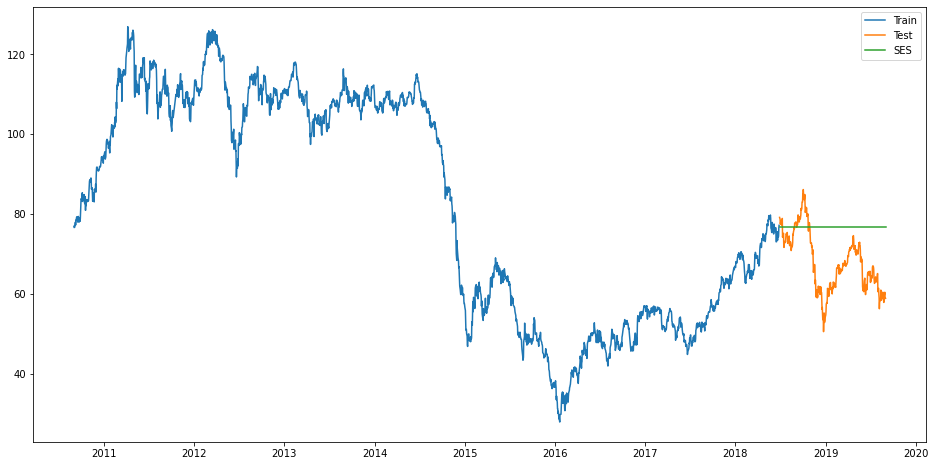

In [15]:
plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

Теперь мы рассчитаем RMSE, чтобы проверить точность нашей модели.

In [16]:

rms = sqrt(mean_squared_error(test.value, y_hat_avg.SES))
print(rms)

11.405345133568066


Мы можем видеть, что реализация простой экспоненциальной модели с альфа 0,6 генерирует наиболее точный прогноз из всех, рассмотренных ранее. Мы можем настроить параметр, используя проверочный набор данных, чтобы сгенерировать еще более лучшую простую экспоненциальную модель.

# Метод 5 –  метод линейного тренда Холта

Нам нужен метод, который может точно отображать тренд без каких-либо предположений. Такой метод, который учитывает тренд набора данных, называется методом линейного тренда Холта.

Каждый набор данных временного ряда может быть разложен на составляющие: тренд, сезонность и остаток. Любой набор данных, который следует за трендом, может использовать метод линейного тренда Холта для прогнозирования.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


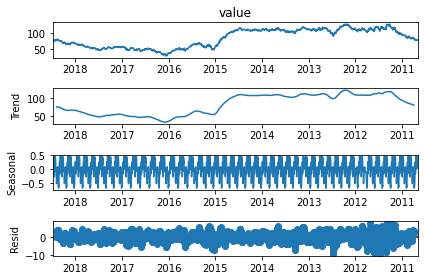

In [10]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train.value,freq=52).plot()
result = sm.tsa.stattools.adfuller(train.value)
plt.show()

Из полученных графиков видно, что этому набору данных соответствует растущий тренд. Следовательно, мы можем использовать линейный тренд Холта для прогнозирования будущих цен.

Холт расширил простое экспоненциальное сглаживание, чтобы позволить прогнозировать данные с трендом. Это не более чем экспоненциальное сглаживание, применяемое как к уровню (среднее значение в ряду), так и к тренду. Чтобы выразить это в математической записи, нам теперь нужно три уравнения: одно для уровня, одно для тренда и одно для объединения уровня и тренда, чтобы получить ожидаемый прогноз.

In [75]:
display(Image(url='https://1.bp.blogspot.com/-cdcBOUWTbTQ/XX0RrN5tvkI/AAAAAAAAg70/bnOO9OCU7lYhBMKxPhER0HJ7xbr1p6WQgCLcBGAsYHQ/s1600/eq.png'))

Значения, которые мы предсказали в вышеупомянутых алгоритмах, называются Уровнем. В приведенных выше трех уравнениях вы можете заметить, что мы добавили уровень и тренд для создания уравнения прогноза.

Как и в случае простого экспоненциального сглаживания, уравнение уровня здесь показывает, что оно представляет собой средневзвешенное значение наблюдения и прогноз на один шаг впереди выборки. Уравнение тренда показывает, что оно представляет собой средневзвешенное значение оценочного тренда в момент времени t на основе ℓ (t) −ℓ (t − 1) и b (t − 1), предыдущей оценки тренда.

Мы добавим эти уравнения, чтобы сгенерировать уравнение прогноза. Мы также можем сгенерировать мультипликативное уравнение прогноза, умножив тренд и уровень вместо сложения. Когда тренд растет или падает линейно, используется аддитивное уравнение, когда тренд растет или падает экспоненциально, используется мультипликативное уравнение. Практика показывает, что умножение является более устойчивым предиктором, 

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


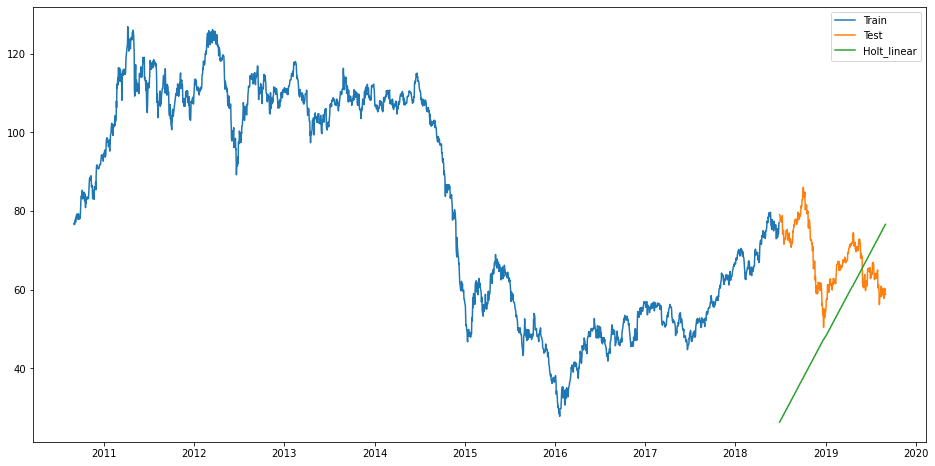

In [18]:
y_hat_avg = test.copy()

fit1=Holt(np.asarray(train['value'])).fit(smoothing_level=0.8,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

Теперь мы рассчитаем RMSE, чтобы проверить точность нашей модели.

In [19]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg.Holt_linear))
print(rms)

25.83684523204595


Мы видим, что этот метод точно отображает тренд и, следовательно, обеспечивает лучшее решение по сравнению с рассмотренными ранее моделями. Мы также можем настроить параметры, чтобы получить еще более точную модель.

# Метод 6 – Метод Холта-Винтера

Рассмотренные ранее модели не учитывают сезонность набора данных при прогнозировании. Следовательно, нам нужен метод, который учитывает как тренд, так и сезонность для прогнозирования будущих цен. Одним из таких алгоритмов, который мы можем использовать в таком сценарии, является метод Холта-Винтера. Идея тройного экспоненциального сглаживания заключается в применении экспоненциального сглаживания к сезонным компонентам в дополнение к уровню и тренду.

Метод Холта-Винтера будет лучшим вариантом среди остальных моделей из-за сезонности. Сезонный метод Холта-Винтера включает в себя уравнение прогноза и три уравнения сглаживания - одно для уровня ℓt, одно для тренда bt и одно для сезонной компоненты, обозначенной st, с параметрами сглаживания α, β и γ.

In [78]:
display(Image(url='https://1.bp.blogspot.com/-gePzHdQPSkk/XX44tbCkypI/AAAAAAAAg88/wLf3rZERpdQ6PUEz42RfqNe5KVUXTItBwCLcBGAsYHQ/s1600/eq.png'))

где s - длина сезонного цикла, для 0 ≤ α ≤ 1, 0 ≤ β ≤ 1 и 0 ≤ γ ≤ 1.

Уравнение уровня показывает средневзвешенное значение между сезонно скорректированным наблюдением и несезонным прогнозом для времени t. Уравнение тренда идентично линейному методу Холта. Сезонное уравнение показывает средневзвешенное значение между текущим сезонным индексом и сезонным индексом того же сезона в прошлом году (т.е. периоды времени назад).

В этом методе мы также можем реализовать как аддитивную, так и мультипликативную технику. Аддитивный метод предпочтителен, когда сезонные колебания примерно постоянны по всему ряду, в то время как мультипликативный метод предпочтителен, когда сезонные колебания изменяются пропорционально уровню ряда.

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


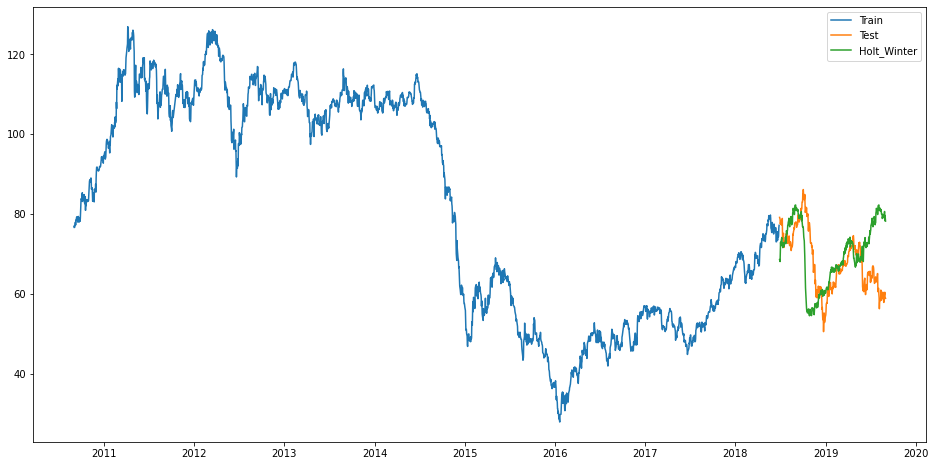

In [20]:
y_hat_avg = test.copy()
fit1=ExponentialSmoothing(np.asarray(train['value']) ,seasonal_periods=286 , seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

Теперь мы рассчитаем RMSE, чтобы проверить точность нашей модели.

In [21]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg.Holt_Winter))
print(rms)

9.990049253759649


Из графика видно, что отображение правильного тренда и сезонности дает гораздо лучшее решение. Мы выбрали seasonal_period = 285, поскольку данные повторяются. Другие параметры могут быть настроены в соответствии с набором данных. Я использовал параметры по умолчанию при построении этой модели. 

# Метод 7 – ARIMA

Еще одна распространенная модель временных рядов, которая очень популярна среди ученых, - это ARIMA. Это сокращение от "Autoregressive Integrated Moving average". В то время как модели экспоненциального сглаживания основывались на описании тренда и сезонности в данных, модели ARIMA стремятся описать корреляции в данных между собой. Улучшение по сравнению с ARIMA - это Seasonal ARIMA. Она учитывает сезонность набора данных так же, как метод Холта Винтера. 

In [ ]:
y_hat_avg = test.copy()
fit1=sm.tsa.statespace.SARIMAX(train.value, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(dynamic=True)
y_hat_avg

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['value'], label='Train')
plt.plot(test['value'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

Теперь мы рассчитаем RMSE, чтобы проверить точность нашей модели.

In [ ]:
rms = sqrt(mean_squared_error(test.value, y_hat_avg.SARIMA))
print(rms)


Мы видим, что использование Seasonal ARIMA создает решение, похожее на метод Холта-Винтера. Мы выбрали параметры в соответствии с графиками ACF и PACF. Вы можете узнать о них больше  по ссылкам, указанным выше. Если вы сталкиваетесь с трудностями при поиске параметров модели ARIMA, вы можете использовать auto.arima, реализованный на языке R. Заменитель auto.arima в Python можно посмотреть здесь.

Мы можем сравнить эти модели на основе их баллов RMSE.

**Заключение:** Использовав все методы прогнозирования и сравних их баллы RMSE, наилучшим оказался метод Метод Холта-Винтера. По данным графиках мы можем сказать, что цены на нефть будут постепено повышаться.